## Atividade 

Aluno: Raul Batista Peixoto

Curso: Física Bacharelado

#### Questão 1 - Problema do decaimento radioativo

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------
# função para calcular a solução exata
# -----------------------------------------
def fdecay(t,N0,tau):
    return N0*np.exp(-t/tau)


Valor de dt =  0.01


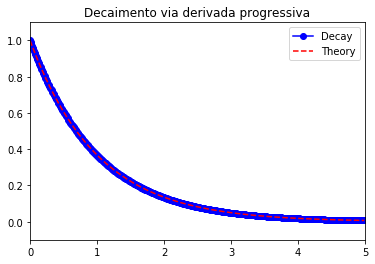

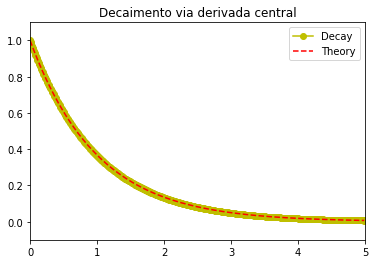

Valor de dt =  0.02


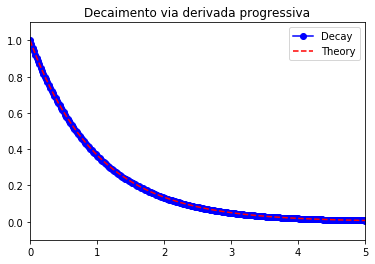

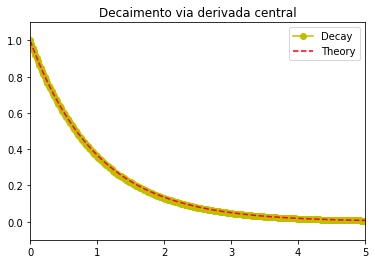

Valor de dt =  0.04


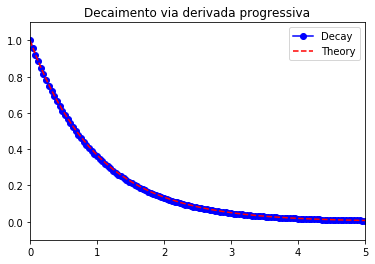

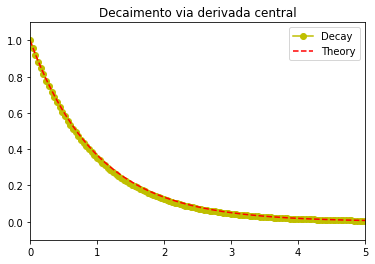

Valor de dt =  0.06


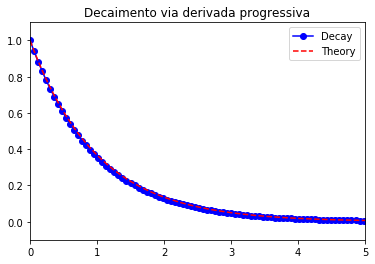

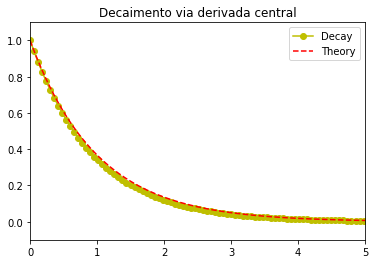

Valor de dt =  0.08


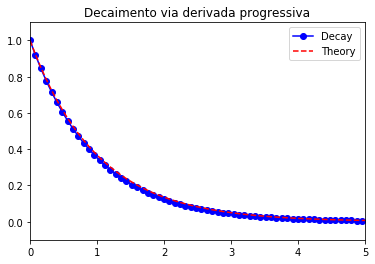

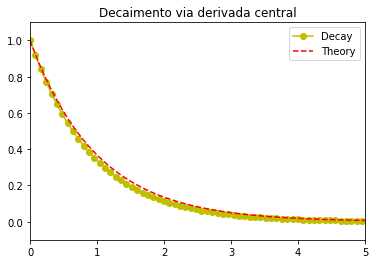

Valor de dt =  0.1


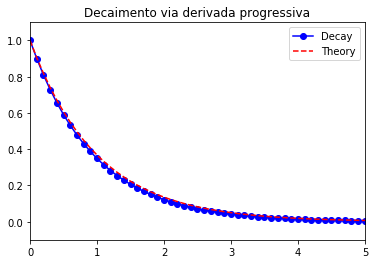

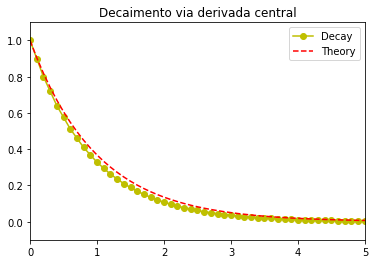

In [39]:
# -----------------------------------------
# inicialização de variáveis
# -----------------------------------------


nt = 500         # number of time steps
tau = 1           # half-life decay time
N0 = 1           # N(0)

    
# -----------------------------------------
# lista para armazenar t e N(t)
# -----------------------------------------

for dt in [0.01,0.02,0.04,0.06,0.08,0.1]:
# cria lista dos t_i com nt elementos todos inicialmente zerados
    time = np.linspace(0,5,nt)

# cria lista dos N_{i} com nt elementos todos inicialmente zerados
# condição inicial da equação diferencial deve ser preenchida
    decayp = np.zeros(nt)
    decayp[0] = N0

# cria lista dos N_{i} com nt elementos para a solução analítica
# todos inicialmente zerados
    theory = np.zeros(nt)
    theory[0] = N0

# -----------------------------------------
# loop de evolução temporal que calcula 
#  os valores teóricos 
# -----------------------------------------
    for i in range (1,nt):
        time[i] = time[i-1] + dt
        theory[i] = fdecay(time[i],N0,tau)
        
# -----------------------------------------
# loop de evolução temporal que calcula 
#       N_{i+1} = N_i(1 - dt/tau) 
# -----------------------------------------
    for i in range(1,nt):
        time[i] = time[i-1] + dt
        decayp[i] = decayp[i-1]*(1-dt/tau)
        
# cria lista dos N_{i} com nt elementos todos inicialmente zerados
# condição inicial da equação diferencial deve ser preenchida

    decayc = np.zeros(nt)
    decayc[0] = N0
    decayc[1] = N0 - N0*(time[1]/tau)

# -----------------------------------------
# loop de evolução temporal que calcula 
#       N_{i+1} = N_{i-1} - 2*N_{i-1}*(dt/tau) 
# -----------------------------------------

    for i in range(1,nt-1):
        time[i+1] = time[i] + dt
        decayc[i+1] = decayc[i-1] - 2*decayc[i-1]*(dt/tau)

    
# -----------------------------------------
# plotagem dos resultados numérico e teórico
# -----------------------------------------

    print('Valor de dt = ',dt)
    plt.plot(time, decayp, '-bo',time,theory,'r--')
    plt.axis([0, 5*tau, -0.1, 1.1])
    plt.title('Decaimento via derivada progressiva')
    plt.legend(['Decay', 'Theory'])
    plt.show()  

    plt.plot(time,decayc,'-yo',time,theory,'r--')
    plt.axis([0, 5*tau, -0.1, 1.1])
    plt.title('Decaimento via derivada central')
    plt.legend(['Decay', 'Theory'])
    plt.show()
    

Observe que há uma grande concordância entre os resultados numericos obtidos a partir da derivada central e progressiva com os valores teóricos.

##### Calculo de erro e erro integrado

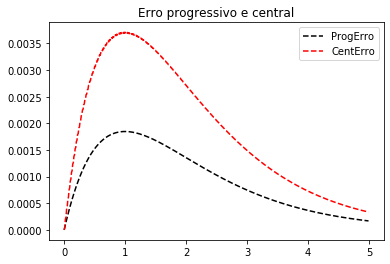

Espaçamento dt entre t[i] e t[i+1]: 0.010
Erro integrado na 1a. derivada progressiva: 0.481
Erro integrado na 1a. derivada de ponto central: 0.961


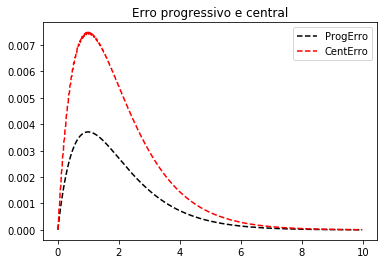

Espaçamento dt entre t[i] e t[i+1]: 0.020
Erro integrado na 1a. derivada progressiva: 0.501
Erro integrado na 1a. derivada de ponto central: 1.001


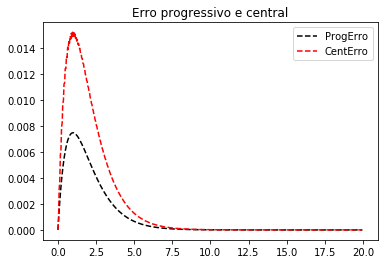

Espaçamento dt entre t[i] e t[i+1]: 0.040
Erro integrado na 1a. derivada progressiva: 0.503
Erro integrado na 1a. derivada de ponto central: 1.003


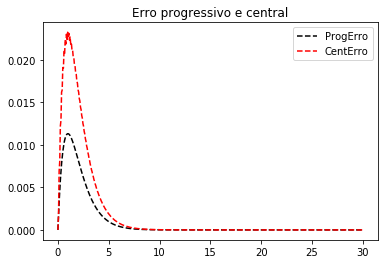

Espaçamento dt entre t[i] e t[i+1]: 0.060
Erro integrado na 1a. derivada progressiva: 0.505
Erro integrado na 1a. derivada de ponto central: 1.005


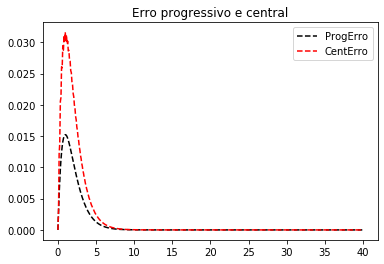

Espaçamento dt entre t[i] e t[i+1]: 0.080
Erro integrado na 1a. derivada progressiva: 0.507
Erro integrado na 1a. derivada de ponto central: 1.007


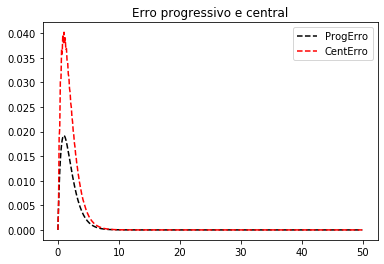

Espaçamento dt entre t[i] e t[i+1]: 0.100
Erro integrado na 1a. derivada progressiva: 0.508
Erro integrado na 1a. derivada de ponto central: 1.008


In [40]:
for dt in [0.01,0.02,0.04,0.06,0.08,0.1]:
# cria lista dos t_i com nt elementos todos inicialmente zerados
    time = np.linspace(0,5,nt)

# cria lista dos N_{i} com nt elementos todos inicialmente zerados
# condição inicial da equação diferencial deve ser preenchida
    decayp = np.zeros(nt)
    decayp[0] = N0

# cria lista dos N_{i} com nt elementos para a solução analítica
# todos inicialmente zerados
    theory = np.zeros(nt)
    theory[0] = N0

# -----------------------------------------
# loop de evolução temporal que calcula 
#  os valores teóricos 
# -----------------------------------------
    for i in range (1,nt):
        time[i] = time[i-1] + dt
        theory[i] = fdecay(time[i],N0,tau)
        
# -----------------------------------------
# loop de evolução temporal que calcula 
#       N_{i+1} = N_i(1 - dt/tau) 
# -----------------------------------------
    for i in range(1,nt):
        time[i] = time[i-1] + dt
        decayp[i] = decayp[i-1]*(1-dt/tau)
        
# cria lista dos N_{i} com nt elementos todos inicialmente zerados
# condição inicial da equação diferencial deve ser preenchida

    decayc = np.zeros(nt)
    decayc[0] = N0
    decayc[1] = N0 - N0*(time[1]/tau)

# -----------------------------------------
# loop de evolução temporal que calcula 
#       N_{i+1} = N_{i-1} - 2*N_{i-1}*(dt/tau) 
# -----------------------------------------

    for i in range(1,nt-1):
        time[i+1] = time[i] + dt
        decayc[i+1] = decayc[i-1] - 2*decayc[i-1]*(dt/tau)

    
# cálculo do erro em cada ponto t_{i}
    err_decayp = np.abs(decayp-theory[0:(nt)]) 
    err_decayc = np.abs(decayc-theory[0:(nt)])

# cálculo do erro integrado
    int_err_decayp = np.sum(err_decayp)
    int_err_decayc = np.sum(err_decayc)
    
# gráfico erro do método de derivada progressiva e central
    plt.plot(time[0:(nt)],err_decayp,'k--',
             time[0:(nt)],err_decayc,'r--')
    plt.title('Erro progressivo e central')
    plt.legend(['ProgErro', 'CentErro'])
    plt.show()
# exibição dos erros integrados
    print("Espaçamento dt entre t[i] e t[i+1]: %5.3f" % (time[1]-time[0]))
    print("Erro integrado na 1a. derivada progressiva: %5.3f" % int_err_decayp)
    print("Erro integrado na 1a. derivada de ponto central: %5.3f" % int_err_decayc)

##### Problema 1.4 do livro:

$\left\{\begin{matrix}
\frac{\mathrm{d} N_a}{\mathrm{d} t} = - \frac{N_a}{\tau _a} \\ 
\frac{\mathrm{d} N_b}{\mathrm{d} t} = \frac{N_a}{\tau _a} - \frac{N_b}{\tau _b}
\end{matrix}\right.$

In [41]:

# -----------------------------------------
# função para calcular a solução exata
# -----------------------------------------
def fdecay_a(t,Na,tau_a):
    return Na*np.exp(-t/tau_a)

def fdecay_b(t,Na,Nb,tau_a,tau_b):
    return Nb*np.exp(-t/tau_b) + Na*(tau_b/(tau_a + tau_b))*np.exp(-t/tau_b) - Na*(tau_b/(tau_a + tau_b))*np.exp((-tau_b*t-2*t*tau_a)/(tau_a*tau_b))



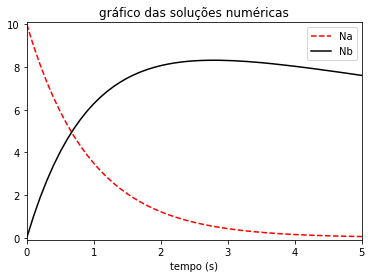

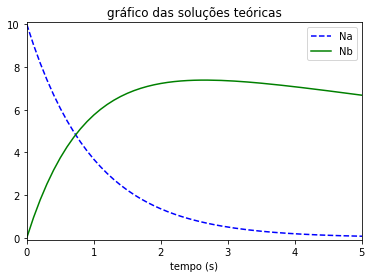

In [42]:
# -----------------------------------------
# inicialização de variáveis
# -----------------------------------------
dt = 0.1          
nt = 500          
tau_a = 1
tau_b = 15
Na = 10
Nb = 0

#Cálculo do tempo total
Tmax = (nt-1)*dt 

# cria lista dos t_i com nt elementos todos inicialmente zerados
time = np.linspace(0,Tmax,nt)

# cria lista dos N_{i} com nt elementos para a solução analítica
# todos inicialmente zerados
theory_a = np.zeros(nt)
theory_a[0] = Na
theory_b = np.zeros(nt)
theory_b[0] = Nb

# -----------------------------------------
# loop de evolução temporal que calcula 
#  os valores teóricos 
# -----------------------------------------
for i in range (1,nt):
        time[i] = time[i-1] + dt
        theory_a[i] = fdecay_a(time[i],Na,tau_a)

for i in range (1,nt):
        time[i] = time[i-1] + dt
        theory_b[i] = fdecay_b(time[i],Na,Nb,tau_a,tau_b)
        
# condição inicial da equações diferenciais
decayA = np.zeros(nt)
decayA[0] = Na

decayB = np.zeros(nt)
decayB[0] = Nb
             
# -----------------------------------------
# loop de evolução temporal que calcula 
#       as funções
# -----------------------------------------

for i in range(1,nt):
    time[i] = time[i-1] + dt
    decayA[i] = decayA[i-1]*(1-dt/tau_a)
    decayB[i] = decayB[i-1] + decayA[i-1]*dt/ (tau_a) - decayB[i-1] *dt/(tau_b)
    
# -----------------------------------------
# plotagem dos resultados numéricos
# -----------------------------------------

plt.xlabel('tempo (s)')
plt.plot(time, decayA, 'r--', time, decayB, '-k')
plt.title('gráfico das soluções numéricas')
plt.legend(['Na', 'Nb'])
plt.axis([0, 5*tau_a, -0.1, 10.1])
plt.show()

# -----------------------------------------
# plotagem dos resultados teóricos
# -----------------------------------------

plt.xlabel('tempo (s)')
plt.plot(time, theory_a, 'b--', time, theory_b, '-g')
plt.title('gráfico das soluções teóricas')
plt.legend(['Na', 'Nb'])
plt.axis([0, 5*tau_a, -0.1, 10.1])
plt.show()

Observe que temos uma boa aproximação para as duas curvas.

#### Problema 1.5 do livro:

$ \left\{\begin{matrix}
\frac{\mathrm{d} N_a}{\mathrm{d} t} = \frac{N_b}{\tau} - \frac{N_a}{\tau} \\ 
\frac{\mathrm{d} N_b}{\mathrm{d} t} = \frac{N_a}{\tau} - \frac{N_b}{\tau}
\end{matrix}\right. $

In [43]:
# -----------------------------------------
# função para calcular a solução exata
# -----------------------------------------

def fdecay_a(t,Na,Nb,tau):
    return Na*np.exp(-t/tau) + Nb*np.exp(-t/tau)/2 - Nb*np.exp(-3*t/tau)/2

def fdecay_b(t,Na,Nb,tau):
    return Nb*np.exp(-t/tau) + Na*np.exp(-t/tau)/2 - Na*np.exp(-3*t/tau)/2


Note que é o mesmo caso da questão 1.4 com tau_a = tau_b = tau.

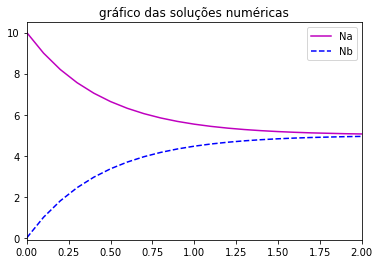

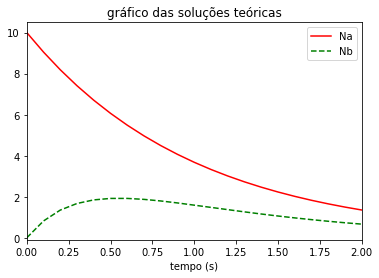

In [44]:
# -----------------------------------------
# inicialização de variáveis
# -----------------------------------------

dt = 0.1          
nt = 500          
tau = 1
Na = 10
Nb = 0

# Cálculo do tempo decorrido

Tmax = (nt-1)*dt 

# cria lista dos t_i com nt elementos todos inicialmente zerados
time = np.linspace(0,Tmax,nt)


# cria lista dos N_{i} com nt elementos para a solução analítica
# todos inicialmente zerados
theory_a = np.zeros(nt)
theory_a[0] = Na
theory_b = np.zeros(nt)
theory_b[0] = Nb

# -----------------------------------------
# loop de evolução temporal que calcula 
#  os valores teóricos 
# -----------------------------------------
for i in range (1,nt):
        time[i] = time[i-1] + dt
        theory_a[i] = fdecay_a(time[i],Na,Nb,tau)

for i in range (1,nt):
        time[i] = time[i-1] + dt
        theory_b[i] = fdecay_b(time[i],Na,Nb,tau)
        
        
# condições iniciais das equações diferenciais

decayA = np.zeros(nt)
decayA[0] = Na
decayB = np.zeros(nt)
decayB[0] = Nb

# -----------------------------------------
# loop de evolução temporal que calcula 
#   os valores numéricos das funções
# -----------------------------------------

for i in range(1,nt):
    tempo[i] = tempo[i-1] + dt
    decayA[i] = decayA[i-1] + decayB[i-1] *dt/ (tau) - decayA[i-1] *dt/(tau)
    decayB[i] = decayB[i-1] + decayA[i-1] *dt/ (tau) - decayB[i-1] *dt/(tau)
    
# -----------------------------------------
# plotagem dos resultados numéricos
# -----------------------------------------

plt.plot(tempo, decayA, 'm', tempo, decayB, 'b--')
plt.title('gráfico das soluções numéricas')
plt.legend(['Na', 'Nb'])
plt.axis([0, 2*tau, -0.1, 10.5])

plt.show()

# -----------------------------------------
# plotagem dos resultados teóricos
# -----------------------------------------

plt.xlabel('tempo (s)')
plt.plot(time, theory_a, '-r', time, theory_b, 'g--')
plt.title('gráfico das soluções teóricas')
plt.legend(['Na', 'Nb'])
plt.axis([0, 2*tau, -0.1, 10.5])
plt.show()

Observamos uma considerável discrepância das curvas numéricas para com as curvas teóricas.